# Quickstart


## Defining tasks

[Tasks](task.ipynb) define some simple or complex computation. They are most easily created by decorating python callables:

In [1]:
import spype


@spype.task
def add_two(num: int) -> int:
    return num + 2


@spype.task
def raise_two(num: int) -> int:
    return num ** 2


@spype.task
def divide_two(num: int) -> int:
    return num // 2


@spype.task
def multiply_two(num: int) -> int:
    return num * 2


@spype.task
def split_str(some_str: str) -> str:
    return some_str.split()


@spype.task
def add_together(num1, num2):
    return num1 + num2


## Hooking tasks together

Tasks can be create by hooking tasks together using the | operator, starting with `spype.pype_input`. 

In [2]:
pype = spype.pype_input | add_two | raise_two | divide_two

Now the pype is a simple callable we can call to push data through the tasks. We will also turn on the print_flow options so that each task will print the data it receives and sends.

In [3]:
spype.set_options(print_flow=True)  # print out flow of data
pype(2)

PypeInput got ((2,), {}) and returned ((2,), {})
add_two got ((2,), {}) and returned ((4,), {})
raise_two got ((4,), {}) and returned ((16,), {})
divide_two got ((16,), {}) and returned ((8,), {})


8

## Plotting pypes
Pype instances can be visualized if you have graphviz installed.

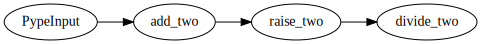

In [4]:
pype.plot()

In [5]:
pype2 = spype.pype_input | (add_two, raise_two, add_two) | (divide_two, multiply_two) | add_two
pype2.print_flow = True
pype2(0)

PypeInput got ((0,), {}) and returned ((0,), {})
add_two got ((0,), {}) and returned ((2,), {})
multiply_two got ((2,), {}) and returned ((4,), {})
add_two got ((4,), {}) and returned ((6,), {})
divide_two got ((2,), {}) and returned ((1,), {})
add_two got ((1,), {}) and returned ((3,), {})
raise_two got ((0,), {}) and returned ((0,), {})
multiply_two got ((0,), {}) and returned ((0,), {})
add_two got ((0,), {}) and returned ((2,), {})
divide_two got ((0,), {}) and returned ((0,), {})
add_two got ((0,), {}) and returned ((2,), {})
add_two got ((0,), {}) and returned ((2,), {})
multiply_two got ((2,), {}) and returned ((4,), {})
add_two got ((4,), {}) and returned ((6,), {})
divide_two got ((2,), {}) and returned ((1,), {})
add_two got ((1,), {}) and returned ((3,), {})


3

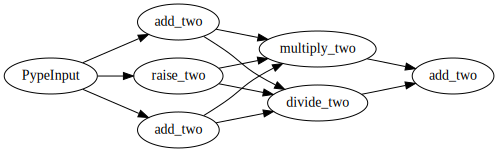

In [6]:
pype2.plot()

## Hooking pypes in series

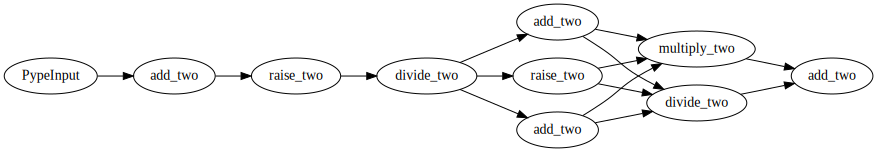

In [7]:
pype3 = pype | pype2  # hook together in series
pype3.plot()

## Hooking pypes in parallel

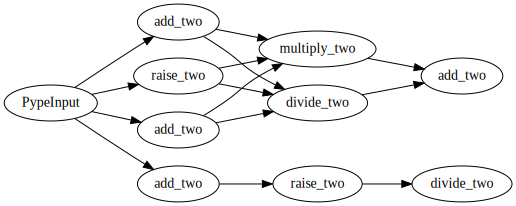

In [8]:
pype4 = pype & pype2  # hook together in parallel
pype4.plot()

## Hooking pypes at any point

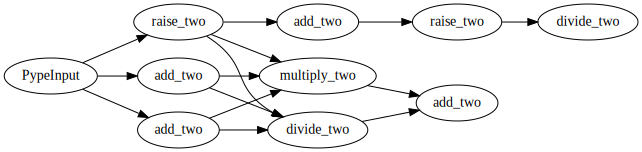

In [9]:
pype5 = pype2[raise_two] | pype
pype5.plot()

## Checking compatibility
If you try to hook pypes together that do not have compatible input/outputs (assuming type hints are correct) an exception will be raised before pushing data through the pype. <a id='the_destination'></a>

In [10]:
pype = spype.pype_input | split_str | add_two

try:
    pype.validate()
except Exception as e:
    print(e)

output of (some_str:str) -> str is not valid input to (num:int) -> int


## Type checking
If an invalid input is given, an exception will be raised right away.

In [11]:
pype = spype.pype_input | split_str

try:
    pype(2)
except Exception as e:
    print(e)

PypeInput got ((2,), {}) and returned ((2,), {})
(2,) and {} are not valid inputs for <function split_str at 0x7f7c5c149c80> which expects a signature of (some_str:str) -> str


The same thing happens if the task returns and incorrect type.

In [12]:
@spype.task
def str_to_int(obj: str) -> str:
    return int(obj)


pype = spype.pype_input | str_to_int

try:
    pype('1')
except TypeError as e:
    print(f'spype raise exception: {e}')
    


PypeInput got (('1',), {}) and returned (('1',), {})
spype raise exception: task: <function str_to_int at 0x7f7c5c181d90> returned: 1 which is not consistent with expected output type of: <class 'str'>


## Constant dependencies

Input arguments for a task can come from the previous task, or can be set to a constant value using the partial method on the task, or the set_item method on the pype.

In [13]:
pype = spype.pype_input | add_together.partial(num1=1)
pype(4)

PypeInput got ((4,), {}) and returned ((4,), {})
add_together got ((4,), {}) and returned ((5,), {})


5

In [14]:
pype = spype.pype_input | add_together
pype['num1'] = 1
pype(4)

PypeInput got ((4,), {}) and returned ((4,), {})
add_together got ((4,), {}) and returned ((5,), {})


5

## Task dependencies

Tasks can also depend on other resolvable tasks (not just the prior task in the graph).


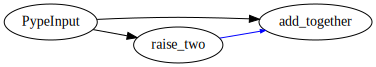

In [15]:
pype = spype.pype_input | add_together.partial(num1=raise_two)
pype &= raise_two  # add raise to in parallel

pype.plot()


The output of `raise_two` will be passed to `add_togher` as parameter num1.

In [16]:
pype(2)

PypeInput got ((2,), {}) and returned ((2,), {})
raise_two got ((2,), {}) and returned ((4,), {})
add_together got ((2,), {}) and returned ((6,), {})


6

 ## Learning more
 
 Spype has many other features, be sure to read through the [Task](task.ipynb) and [Pype](pype.ipynb) sections.